Завантажте зображення titanic.jpg, що знаходиться в репозиторії лекції. Застосуйте до нього методи детекції облич Віоли-Джонса та HOG.
Оформіть результати детекції в середовищі Jupyter Notebook.

In [25]:
import cv2
import imutils

### Метод Viola-Jones:

In [26]:
img = cv2.imread("titanic.jpg")
img = imutils.resize(img, width=800)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('Original image', img)

rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
gray_rotated = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)
faces_rotated = face_cascade.detectMultiScale(gray_rotated, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces_rotated:
    cv2.rectangle(rotated_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('Rotated image', rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### HOG метод:

In [27]:
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt

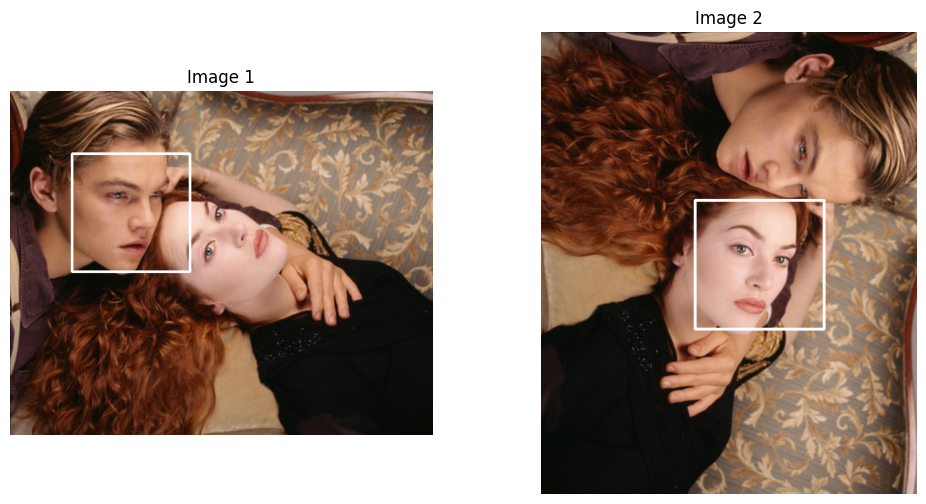

In [28]:
img1 = cv2.imread("titanic.jpg")
img2 = cv2.imread("titanic.jpg")
img1 = imutils.resize(img1, width=800)
img2 = imutils.resize(img2, width=800)
img2 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

face_detector = dlib.get_frontal_face_detector()

rects1 = face_detector(img1_rgb, 1)
for rect in rects1:
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img1_rgb, (x, y), (x + w, y + h), (255, 255, 255), 3)


rects2 = face_detector(img2_rgb, 1)
for rect in rects2:
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img2_rgb, (x, y), (x + w, y + h), (255, 255, 255), 3)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img1_rgb)
axs[0].set_title("Image 1")
axs[0].axis('off')
axs[1].imshow(img2_rgb)
axs[1].set_title("Image 2")
axs[1].axis('off')
plt.show()